<p><font size="6"><b>06 - Pandas: "Group by" operations</b></font></p>

Adapted version from:
> *© 2021, Joris Van den Bossche and Stijn Van Hoey  (<mailto:jorisvandenbossche@gmail.com>, <mailto:stijnvanhoey@gmail.com>). Licensed under [CC BY 4.0 Creative Commons](http://creativecommons.org/licenses/by/4.0/)*

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

/var/folders/r1/mgm0ws211kg73r04pnxb4mjw0000gn/T/ipykernel_75183/2290088659.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


# Some 'theory': the groupby operation (split-apply-combine)

In [2]:
df = pd.DataFrame({'key':['A','B','C','A','B','C','A','B','C'],
                   'data': [0, 5, 10, 5, 10, 15, 10, 15, 20]})
df

,key,data
0,A,0
1,B,5
2,C,10
3,A,5
4,B,10
5,C,15
6,A,10
7,B,15
8,C,20


### Recap: aggregating functions

When analyzing data, you often calculate summary statistics (aggregations like the mean, max, ...). As we have seen before, we can easily calculate such a statistic for a Series or column using one of the many available methods. For example:

In [3]:
df['data'].sum()

90

However, in many cases your data has certain groups in it, and in that case, you may want to calculate this statistic for each of the groups.

For example, in the above dataframe `df`, there is a column 'key' which has three possible values: 'A', 'B' and 'C'. When we want to calculate the sum for each of those groups, we could do the following:

In [4]:
for key in ['A', 'B', 'C']:
    print(key, df[df['key'] == key]['data'].sum())

A 15
B 30
C 45


This becomes very verbose when having multiple groups. You could make the above a bit easier by looping over the different values, but still, it is not very convenient to work with.

What we did above, applying a function on different groups, is a "groupby operation", and pandas provides some convenient functionality for this.

### Groupby: applying functions per group

The "group by" concept: we want to **apply the same function on subsets of your dataframe, based on some key to split the dataframe in subsets**

This operation is also referred to as the "split-apply-combine" operation, involving the following steps:

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

<img src="../img/pandas/splitApplyCombine.png">

Similar to SQL `GROUP BY`

Instead of doing the manual filtering as above


    df[df['key'] == "A"].sum()
    df[df['key'] == "B"].sum()
    ...

pandas provides the `groupby` method to do exactly this:

In [5]:
df.groupby('key').sum()

,data
key,
A,15
B,30
C,45


In [6]:
df.groupby('key').aggregate(np.sum)  # 'sum'

,data
key,
A,15
B,30
C,45


And many more methods are available.

In [7]:
df.groupby('key')['data'].sum()

key
A    15
B    30
C    45
Name: data, dtype: int64

# Application of the groupby concept on the titanic data

We go back to the titanic passengers survival data:

In [8]:
df = pd.read_csv("data/titanic.csv")

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<div class="alert alert-success">

<b>EXERCISE 1</b>:

 <ul>
  <li>Using groupby(), calculate the average age for each sex.</li>
</ul>
</div>

In [20]:
# %load _solutions/pandas_05_groupby_operations1.py

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

<div class="alert alert-success">

<b>EXERCISE 2</b>:

 <ul>
  <li>Calculate the average survival ratio for all passengers.</li>
</ul>
</div>

In [23]:
# %load _solutions/pandas_05_groupby_operations2.py

<div class="alert alert-success">

<b>EXERCISE 3</b>:

 <ul>
  <li>Calculate this survival ratio for all passengers younger than 25 (remember: filtering/boolean indexing).</li>
</ul>
</div>

In [25]:
# %load _solutions/pandas_05_groupby_operations3.py

<div class="alert alert-success">

<b>EXERCISE 4</b>:

 <ul>
  <li>What is the difference in the survival ratio between the sexes?</li>
</ul>
</div>

In [26]:
# %load _solutions/pandas_05_groupby_operations4.py

<div class="alert alert-success">

<b>EXERCISE 5</b>:

 <ul>
  <li>Make a bar plot of the survival ratio for the different classes ('Pclass' column).</li>
</ul>
</div>

<Axes: xlabel='Pclass'>

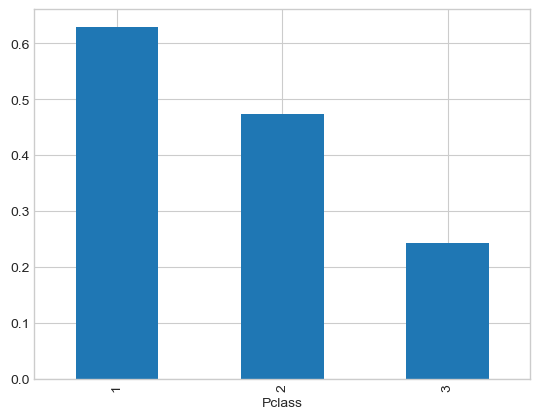

In [32]:
# %load _solutions/pandas_05_groupby_operations5.py
df.groupby('Pclass')['Survived'].mean().plot(kind='bar') #and what if you would compare the total number of survivors?

<div class="alert alert-success">

**EXERCISE 6**:

* Make a bar plot to visualize the average Fare payed by people depending on their age. The age column is divided is separate classes using the `pd.cut()` function as provided below.

</div>

In [36]:
df['AgeClass'] = pd.cut(df['Age'], bins=np.arange(0,90,10))

<Axes: xlabel='AgeClass'>

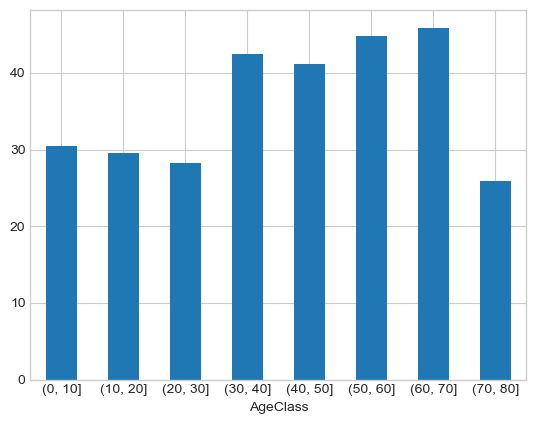

In [35]:
# %load _solutions/pandas_05_groupby_operations6.py
df.groupby('AgeClass')['Fare'].mean().plot(kind='bar', rot=0)

If you are ready, more groupby exercises can be found below.

# Some more theory

## Specifying the grouper

In the previous example and exercises, we always grouped by a single column by passing its name. But, a column name is not the only value you can pass as the grouper in `df.groupby(grouper)`. Other possibilities for `grouper` are:

- a list of strings (to group by multiple columns)
- a Series (similar to a string indicating a column in df) or array
- function (to be applied on the index)
- levels=[], names of levels in a MultiIndex

In [ ]:
df.groupby(df['Age'] < 18)['Survived'].mean()

In [ ]:
df.groupby(['Pclass', 'Sex'])['Survived'].mean()

## The size of groups - value counts

Often you want to know how many elements there are in a certain group (or in other words: the number of occurences of the different values from a column).

To get the size of the groups, we can use `size`:

In [ ]:
df.groupby('Pclass').size()

In [ ]:
df.groupby('Embarked').size()

Another way to obtain such counts, is to use the Series `value_counts` method:

In [ ]:
df['Embarked'].value_counts()